# Lecture: AutoML with H20
---

## Overview
The purpose of this lecture is to do classification of `Hotel_Reservations` dataset with automl from H2O library, evaluate the results and pick up the best model.

Install h20 library.

In [10]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [11]:
# If you have an error in creation role, try to upgrade boto3
%pip install --upgrade boto3

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 93.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.71
    Uninstalling botocore-1.29.71:
      Successfully uninstalled botocore-1.29.71
  Attempting uninstall: boto3
    Found existing installation: boto3 1.26.71
    Uninstalling boto3-1.26.71:
      Successfully uninstalled boto3-1.26.71
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.27.71 requires botocore==1.29.71, but you have botocore 1.29.88 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Import dependencies

In [1]:
import h2o
from h2o.automl import H2OAutoML
import boto3

Start the H2O cluster (locally)

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_352"; OpenJDK Runtime Environment (build 1.8.0_352-b08); OpenJDK 64-Bit Server VM (build 25.352-b08, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxcid6oga
  JVM stdout: /tmp/tmpxcid6oga/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmpxcid6oga/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,7 hours and 12 minutes
H2O_cluster_name:,H2O_from_python_ec2_user_7fyueh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,851 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Load the data

In [6]:
dataset_name = 'Hotel_Reservations.csv'
bucket_data_name = 'bah-data'
data_location = 's3://{}/{}'.format(bucket_data_name, dataset_name)

data = h2o.import_file(data_location)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
data.head(5)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5,0,Canceled


Split the data into train/test datasets

In [8]:
train, test = data.split_frame(ratios=[.75])

In [9]:
x_columns = train.columns
target_column = "booking_status"

Remove `Booking_ID` and `booking_status` columns as well.

We do not need `Booking_ID` while `booking_status` is our target variable

In [10]:
x_columns.remove(target_column)
x_columns.remove('Booking_ID')

For binary classification, response should be a factor

In [11]:
train[target_column] = train[target_column].asfactor()
test[target_column] = test[target_column].asfactor()

Set how many models you want to try

In [25]:
number_of_models = 4

Train the models.. 

Wait a bit..

In [14]:
aml = H2OAutoML(max_models=number_of_models, seed=1)
aml.train(x=x_columns, y=target_column, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230309_223147


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/2
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0538608991158338
RMSE: 0.23207951033176927
LogLoss: 0.1859123457677895
AUC: 0.979808188987224
AUCPR: 0.9898430924262522
Gini: 0.959616377974448
Null degrees of freedom: 10016
Residual degrees of freedom: 10014
Null deviance: 12657.566452749827
Residual deviance: 3724.567935111895
AIC: 3730.567935111895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5079334648934098
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  ---------------
Canceled      2811        461             0.1409   (461.0/3272.0)
Not_Canceled  247         6498            0.0366   (247.0/6745.0)
Total         3058        6959            0.0707   (708.0/10017.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.507933     0.948336  223
max f2                       0.339233     0.969288  273
max f0point5                 0.688735     0.952595  166
max accuracy                 0.515653     0.92932   221
max precision                0.999377     1         0
max recall                   0.0812113    1         359
max specificity              0.999377     1         0
max absolute_mcc             0.515653     0.837682  221
max min_per_class_accuracy   0.661204     0.919941  175
max mean_per_class_accuracy  0.668526     0.920873  173
max tns                      0.999377     3272      0
max fns                      0.999377     6641      0
max fps                      0.0013324    3272      399
max tps                      0.0812113    6745      359
max tnr                      0.999377     1         0
max fnr                      0.999377     0.984581  0
max fpr                      0.0013324    1         399
max tpr                      0.0812113    1         359

Gains/Lift Table: Avg response rate: 67.34 %, avg score: 67.16 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100829                   0.999125           1.4851     1.4851             1                0.999415    1                           0.999415            0.0149741       0.0149741                  48.51     48.51              0.0149741
2        0.0200659                   0.998798           1.4851     1.4851             1                0.998945    1                           0.999181            0.0148258       0.0297999                  48.51     48.51              0.0297999
3        0.0300489                   0.998401           1.4851     1.4851             1                0.998601    1                           0.998988            0.0148258       0.0446256                  48.51     48.51              0.0446256
4        0.0400319                   0.99805            1.4851     1.4851       

View the AutoML Leaderboard with some basic metrics

In [17]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20230309_223147,0.945562,0.270852,0.970215,0.145794,0.288619,0.0833011
XGBoost_1_AutoML_1_20230309_223147,0.945429,0.271397,0.970069,0.153765,0.288989,0.0835145
GLM_1_AutoML_1_20230309_223147,0.863983,0.424659,0.925129,0.251383,0.370564,0.137317


Predict on Test dataset

In [18]:
predictions = aml.predict(test)
print(predictions)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
predict         Canceled    Not_Canceled
Not_Canceled  0.0357407       0.964259
Canceled      0.995659        0.00434083
Canceled      0.846728        0.153272
Not_Canceled  0.216139        0.783861
Not_Canceled  0.0218697       0.97813
Canceled      0.757013        0.242987
Not_Canceled  0.00128944      0.998711
Not_Canceled  0.0197891       0.980211
Canceled      0.899059        0.100941
Not_Canceled  0.268888        0.731112
[9027 rows x 3 columns]



View the AutoML Leaderboard with ALL columns included for more exploration and analysis of the results.

In [21]:
lb = h2o.automl.get_leaderboard(aml, extra_columns="ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20230309_223147,0.945562,0.270852,0.970215,0.145794,0.288619,0.0833011,20546,0.015315,StackedEnsemble
XGBoost_1_AutoML_1_20230309_223147,0.945429,0.271397,0.970069,0.153765,0.288989,0.0835145,5678,0.009674,XGBoost
GLM_1_AutoML_1_20230309_223147,0.863983,0.424659,0.925129,0.251383,0.370564,0.137317,1389,0.002739,GLM


Get the best model with defaul settings:

In [22]:
default_best_model = aml.get_best_model()

Get the best model with specified criteria. In this case, we will use `aucpr` - Area Under the Precision-Recall

Other available criteria metrics for any kind of model:

"AUTO", "AUC", "AUCPR", "logloss", "MAE", "mean_per_class_error",
"deviance", "MSE", "predict_time_per_row_ms", "RMSE", "RMSLE", "training_time_ms"

In [23]:
best_model_with_auc_pr = aml.get_best_model(criterion="aucpr")

Explain best model for further analysis:

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230309_223147

,Canceled,Not_Canceled,Error,Rate
Canceled,2178.0,712.0,0.2464,(712.0/2890.0)
Not_Canceled,306.0,5831.0,0.0499,(306.0/6137.0)
Total,2484.0,6543.0,0.1128,(1018.0/9027.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

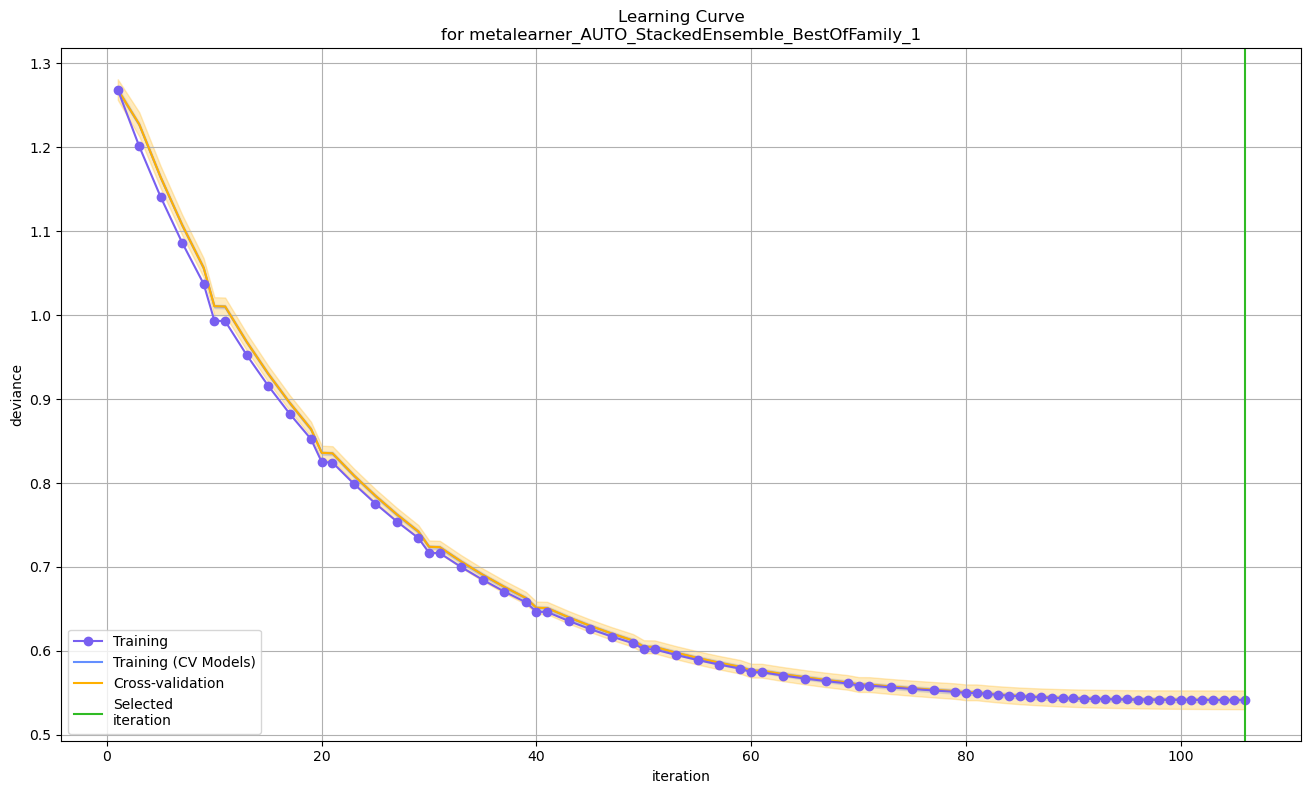

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

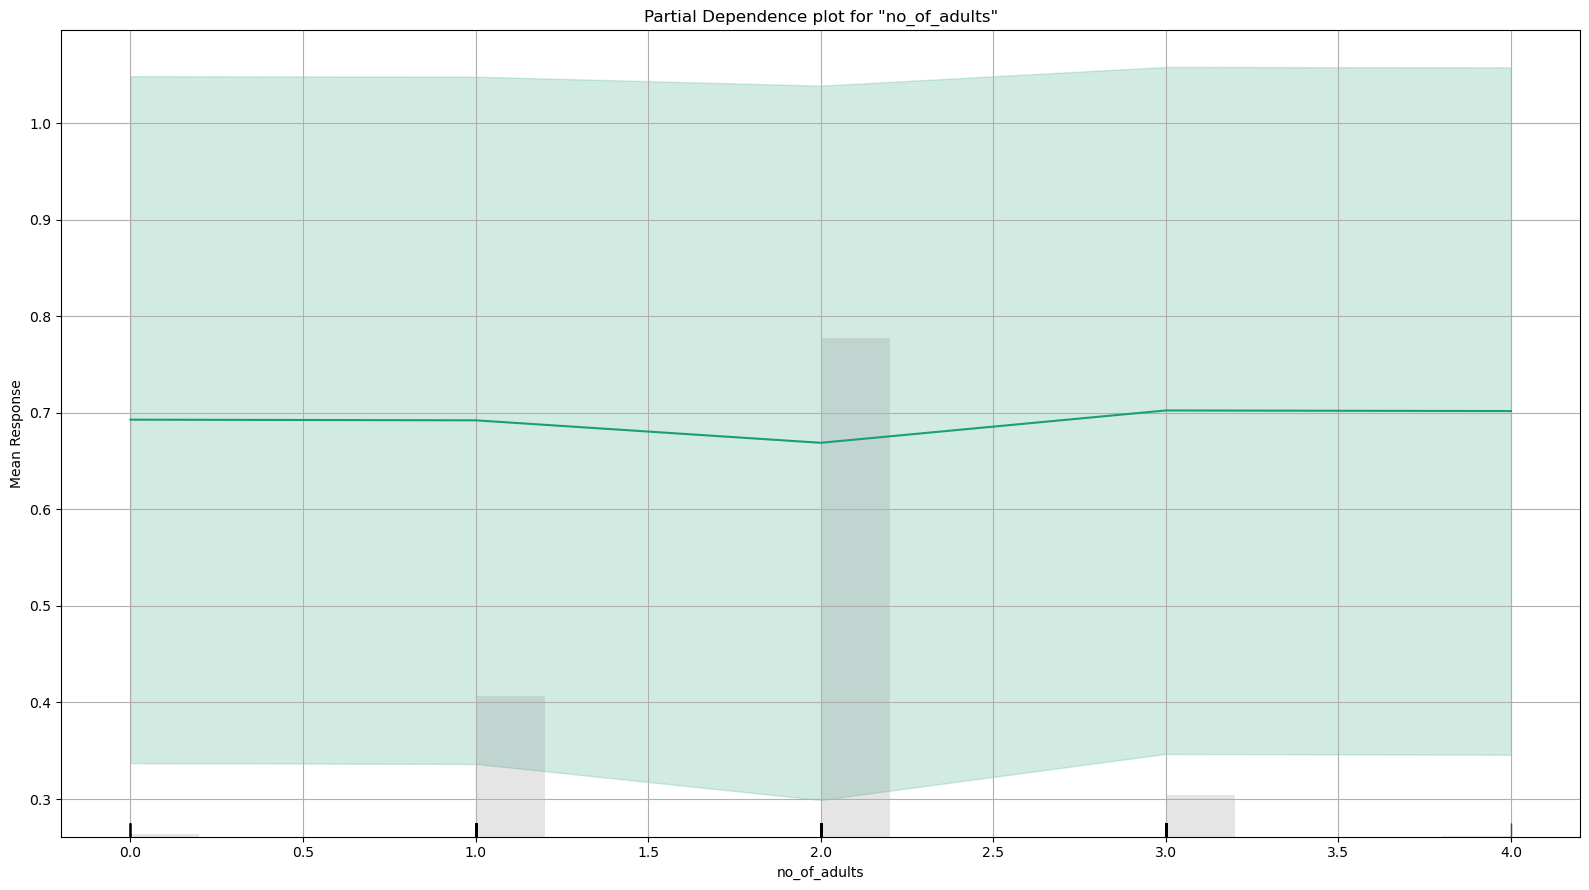

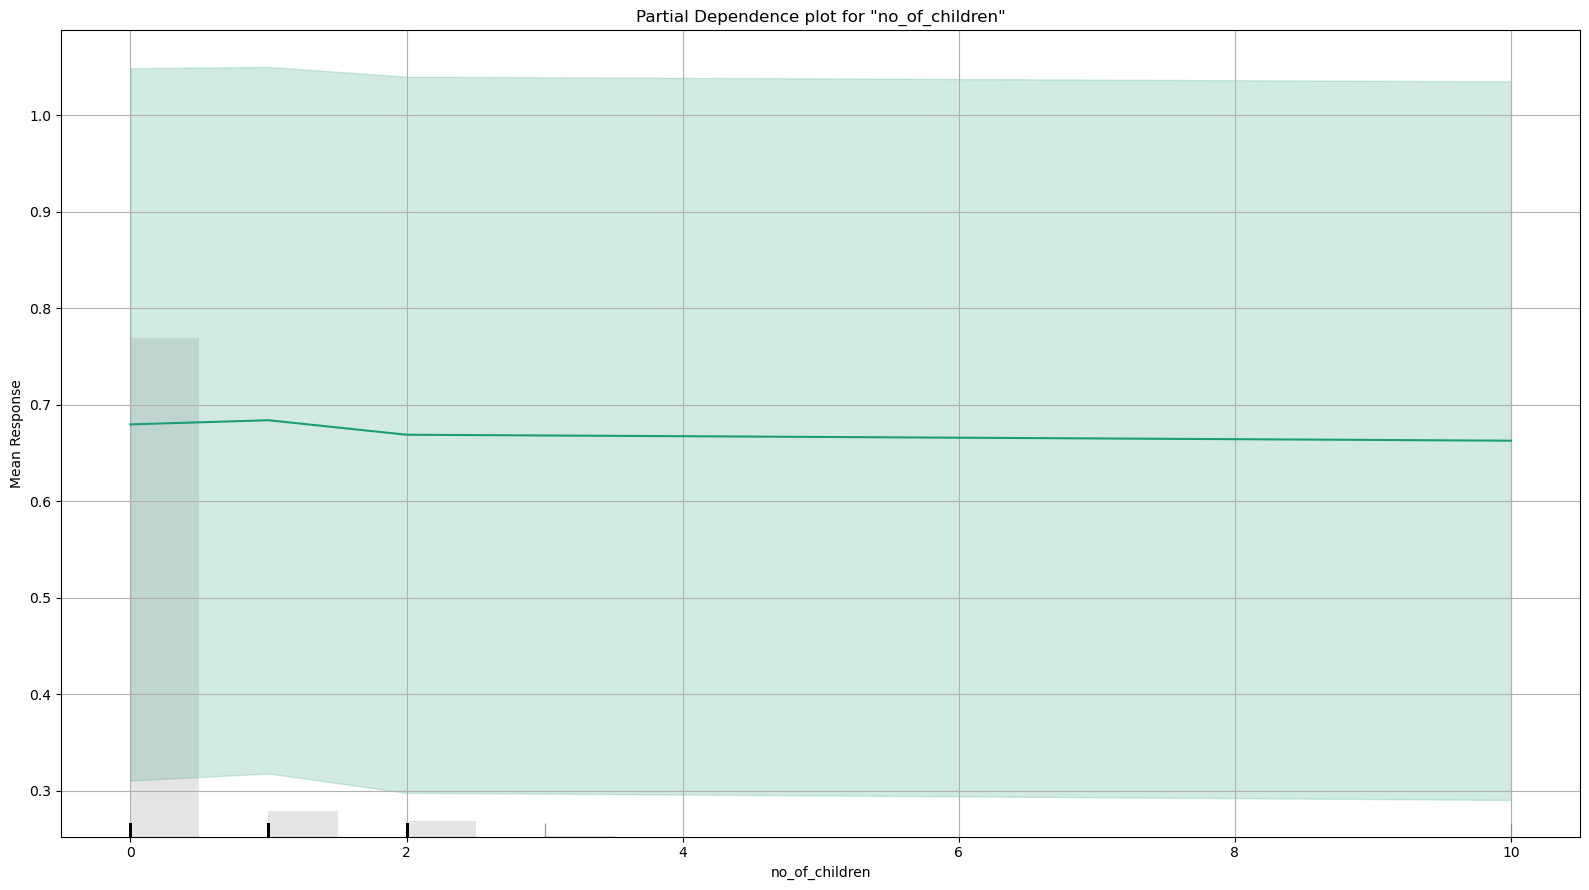

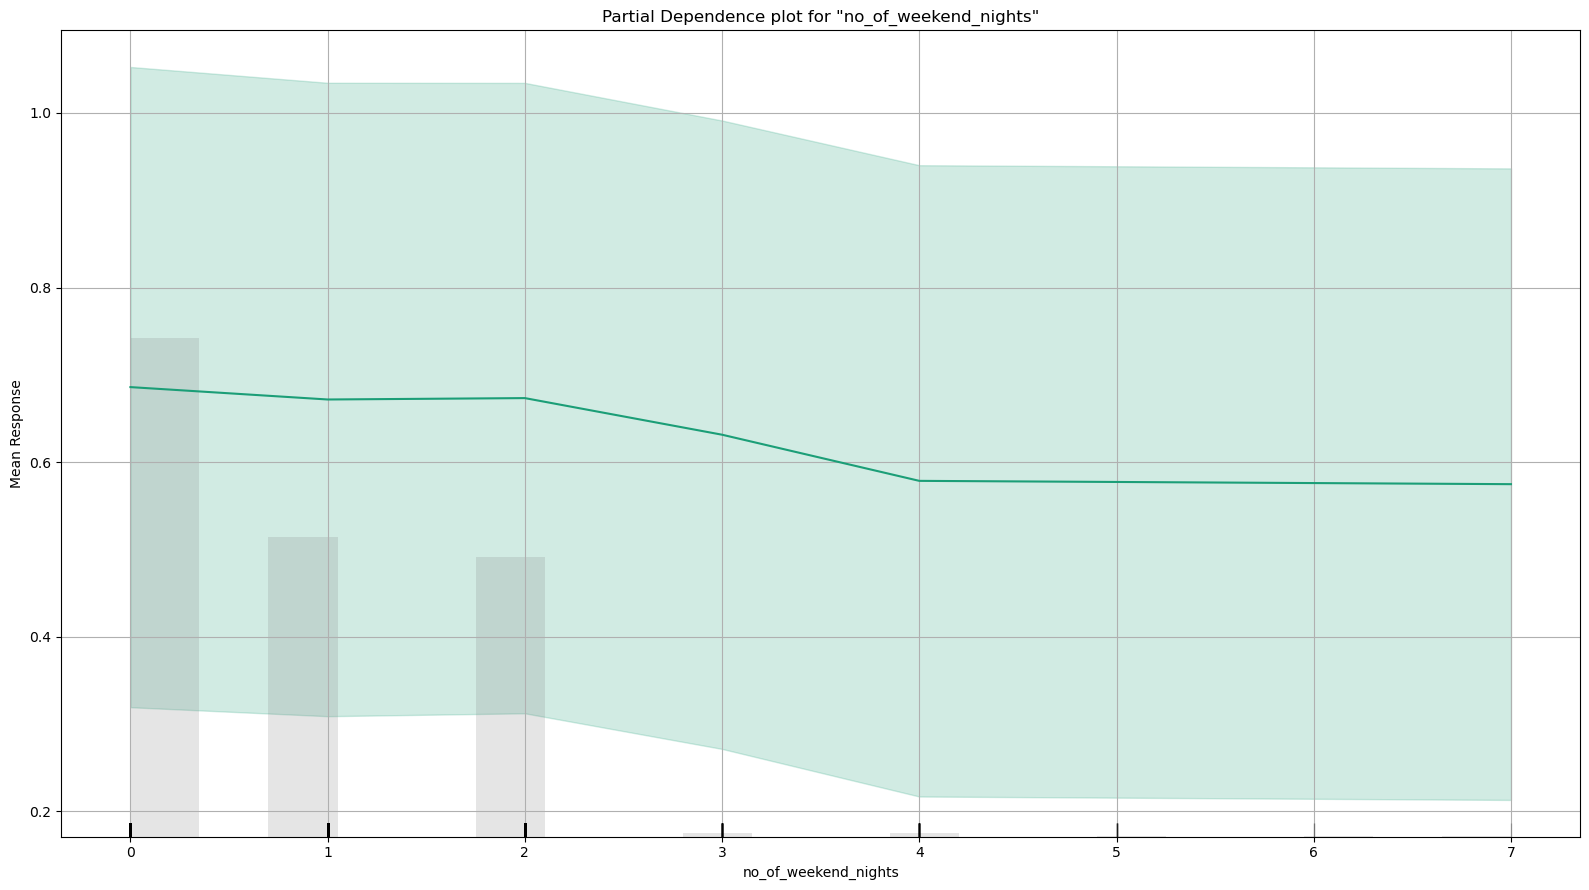

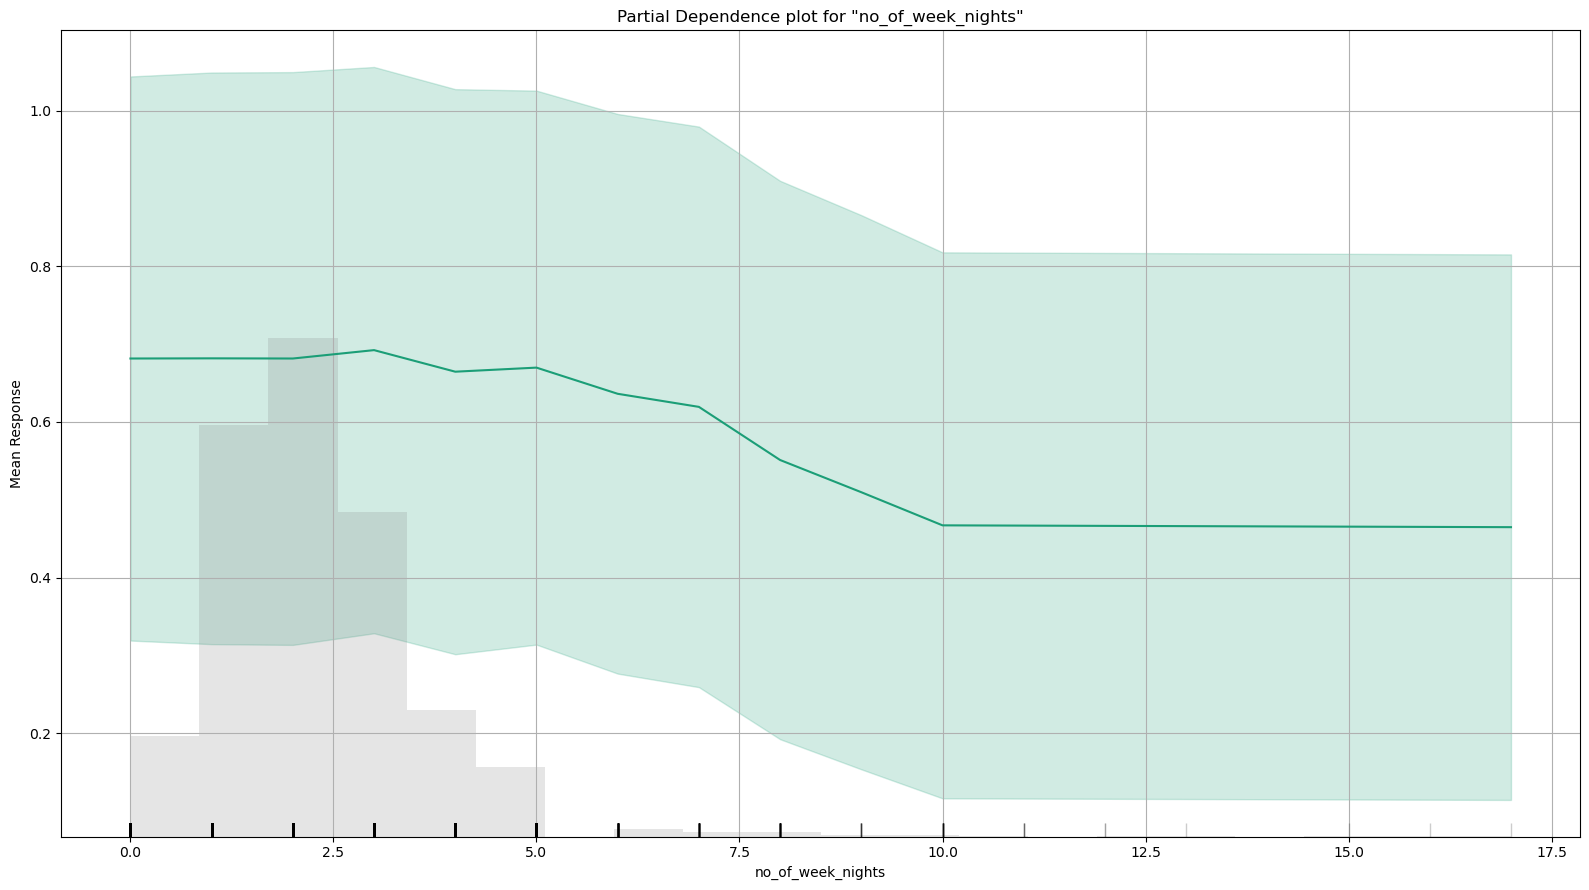

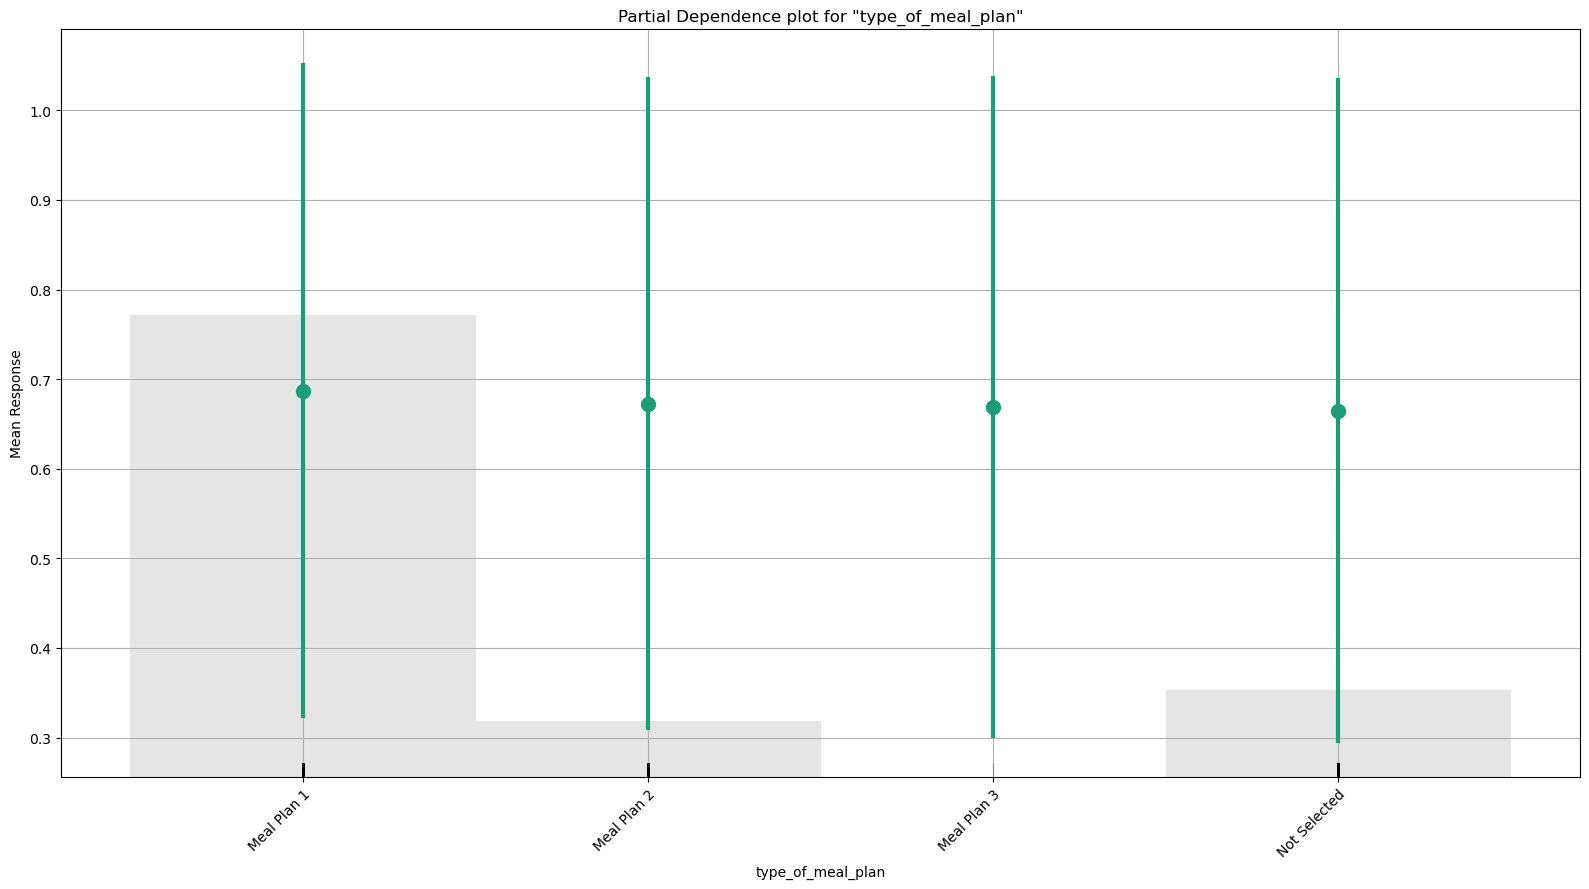

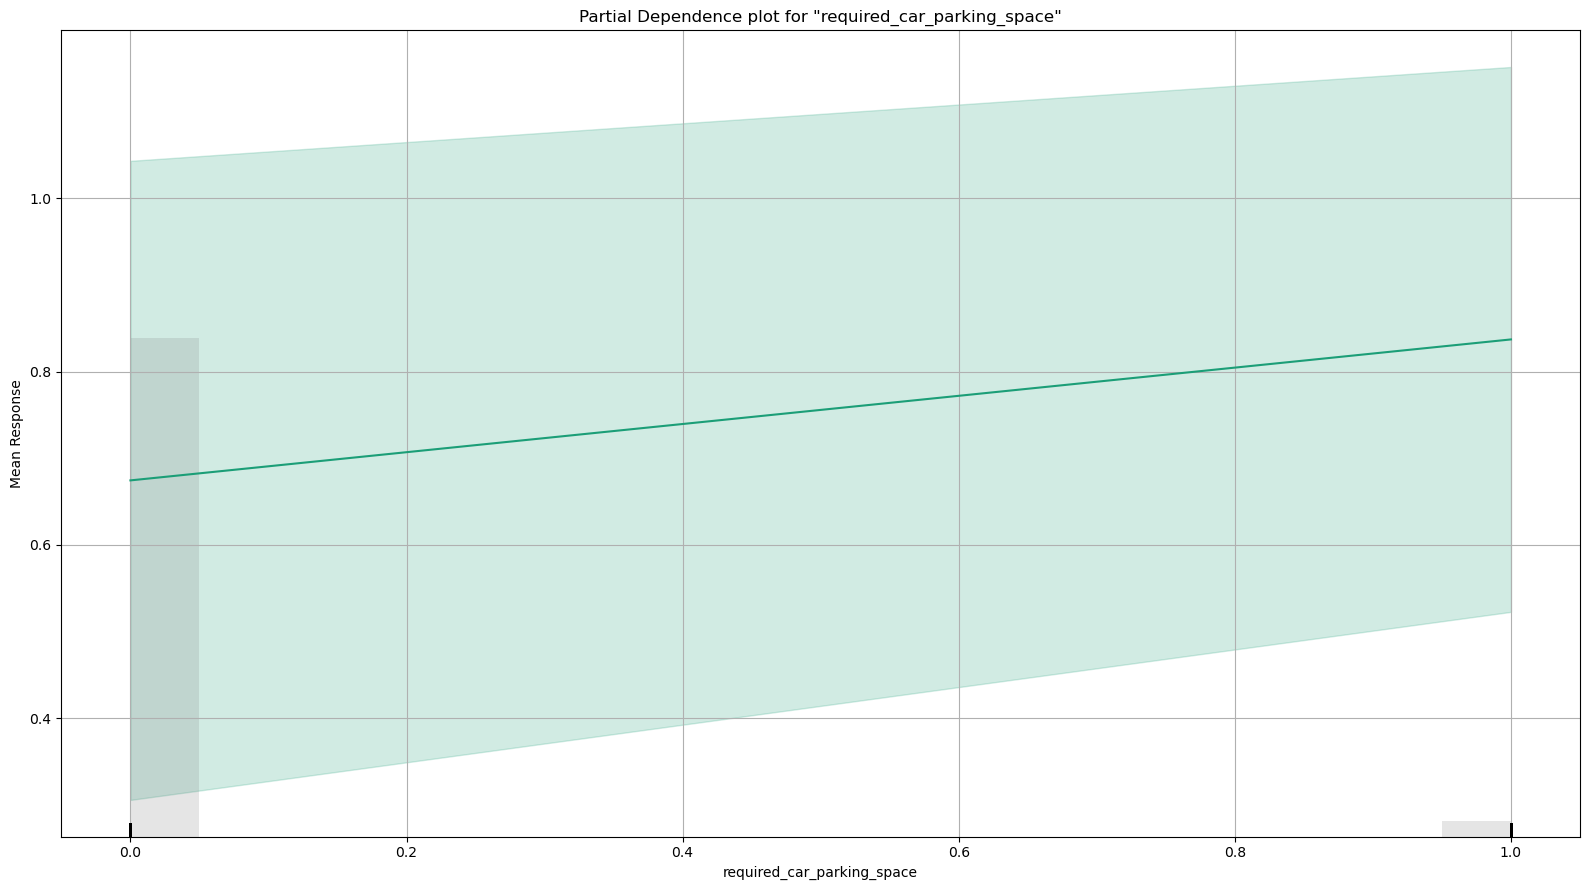

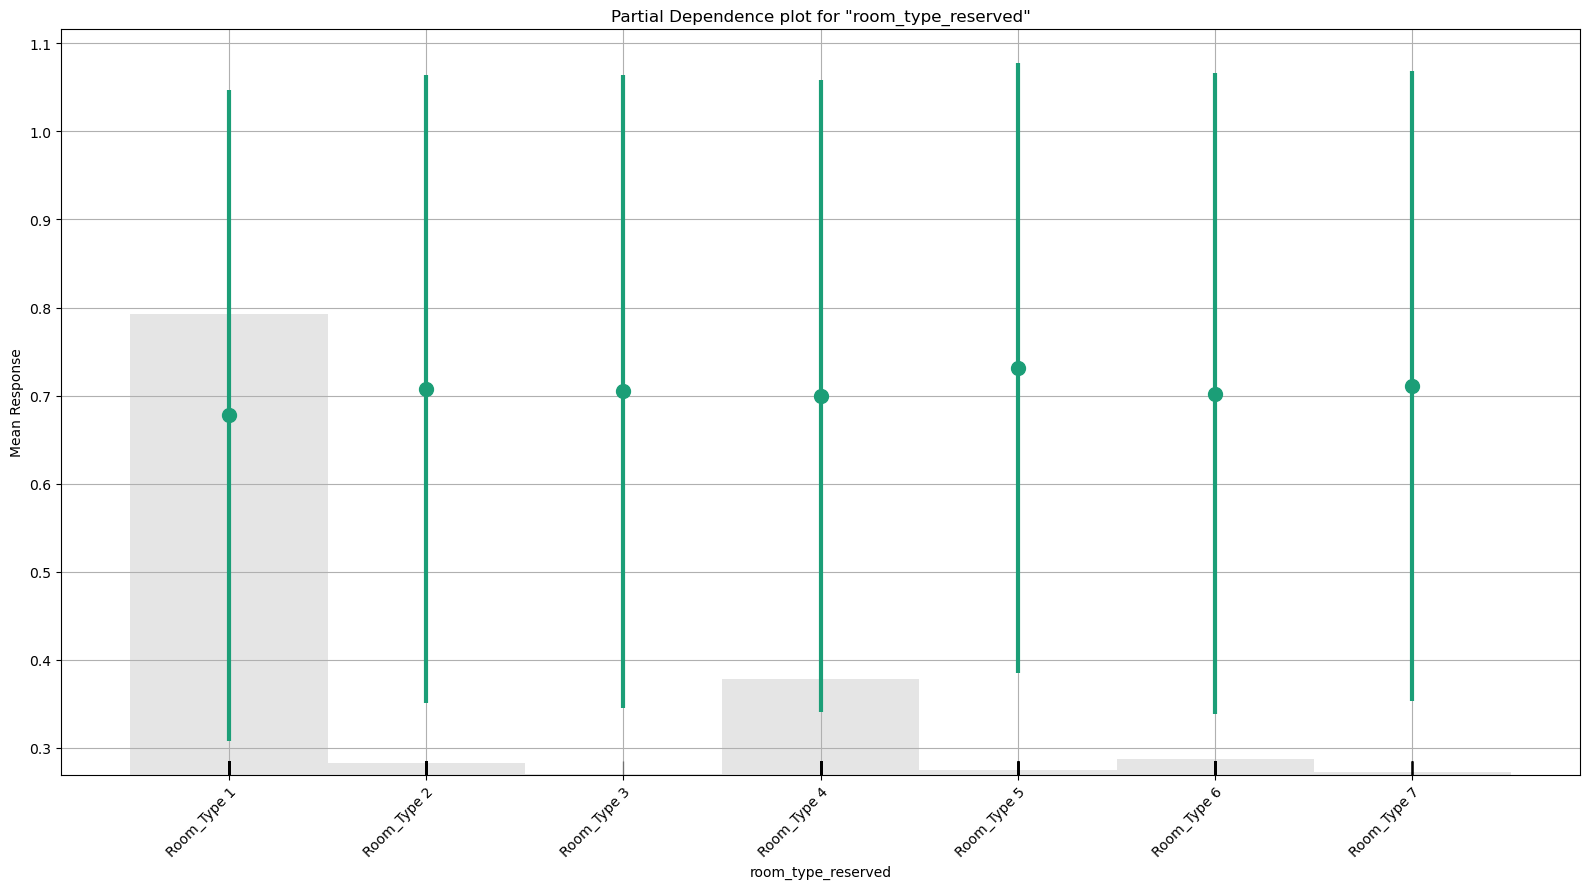

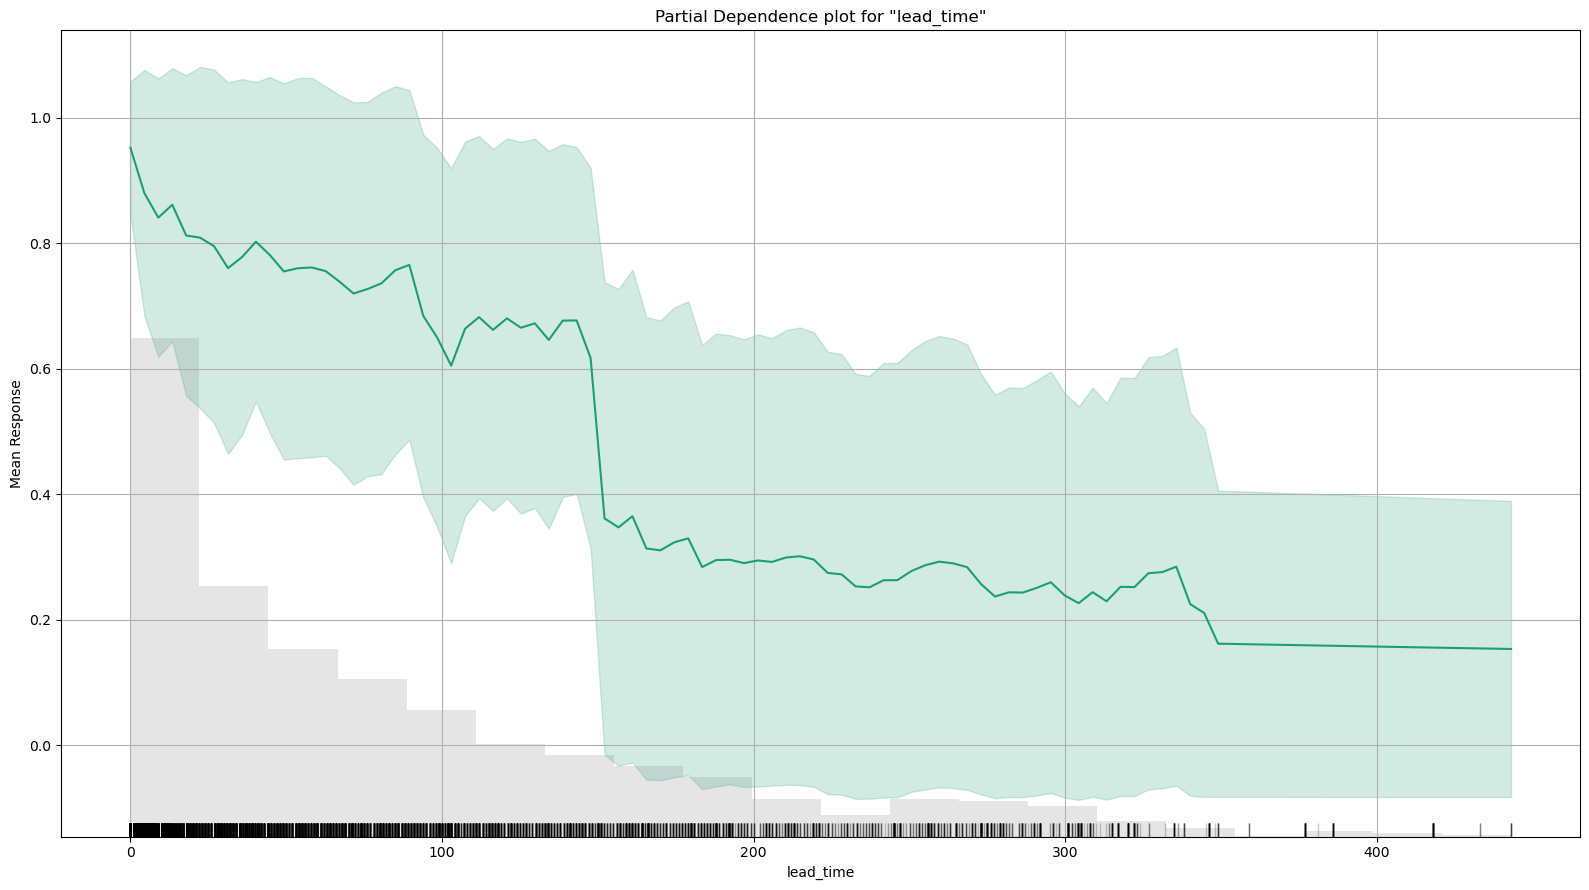

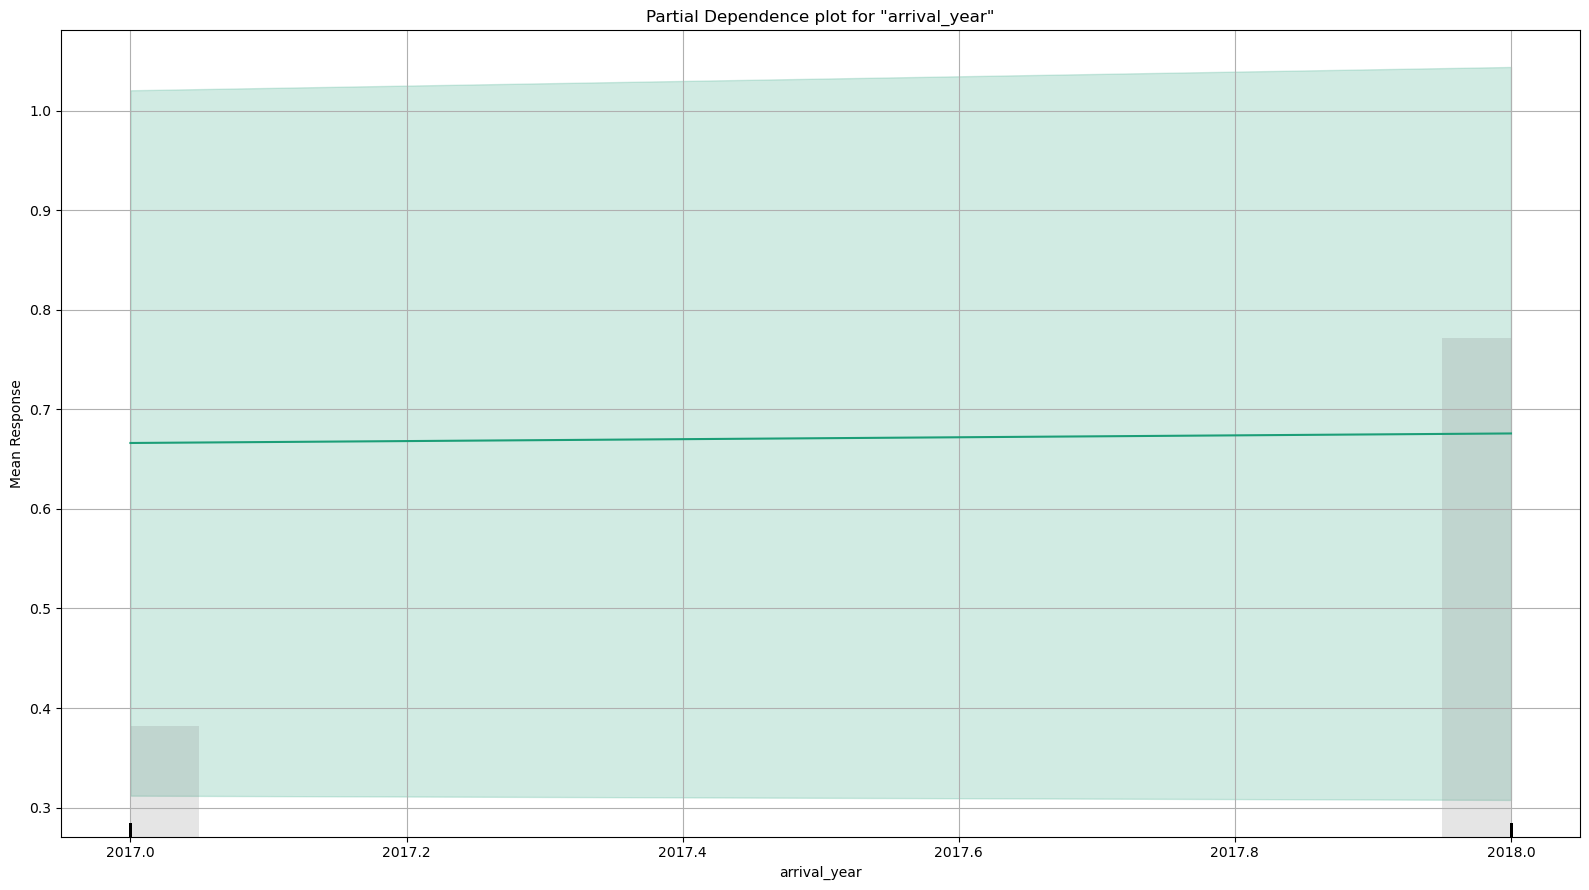

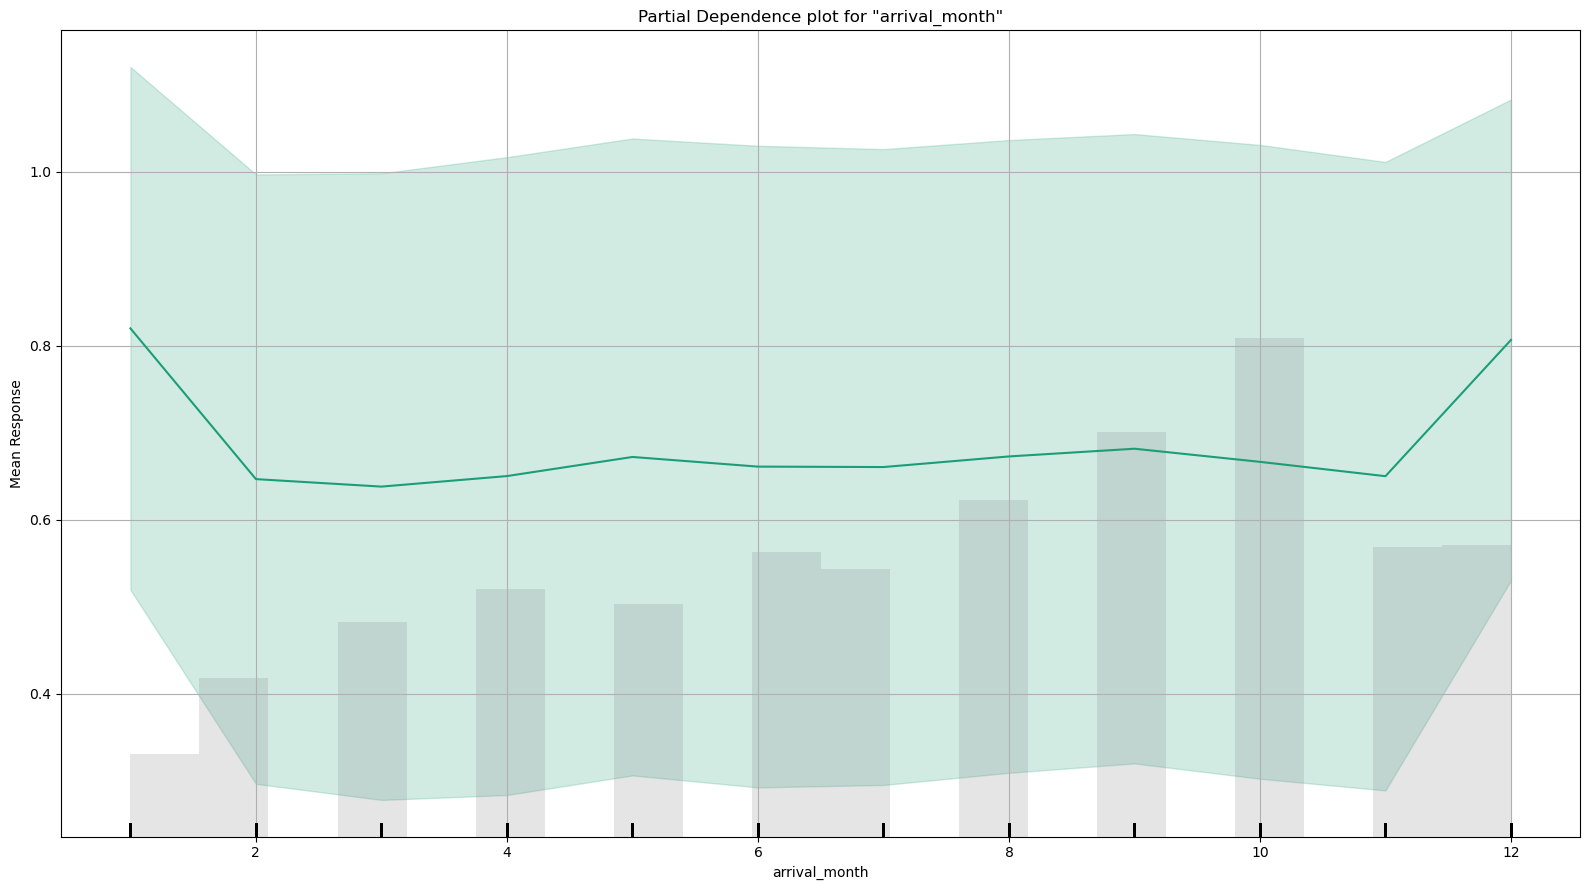

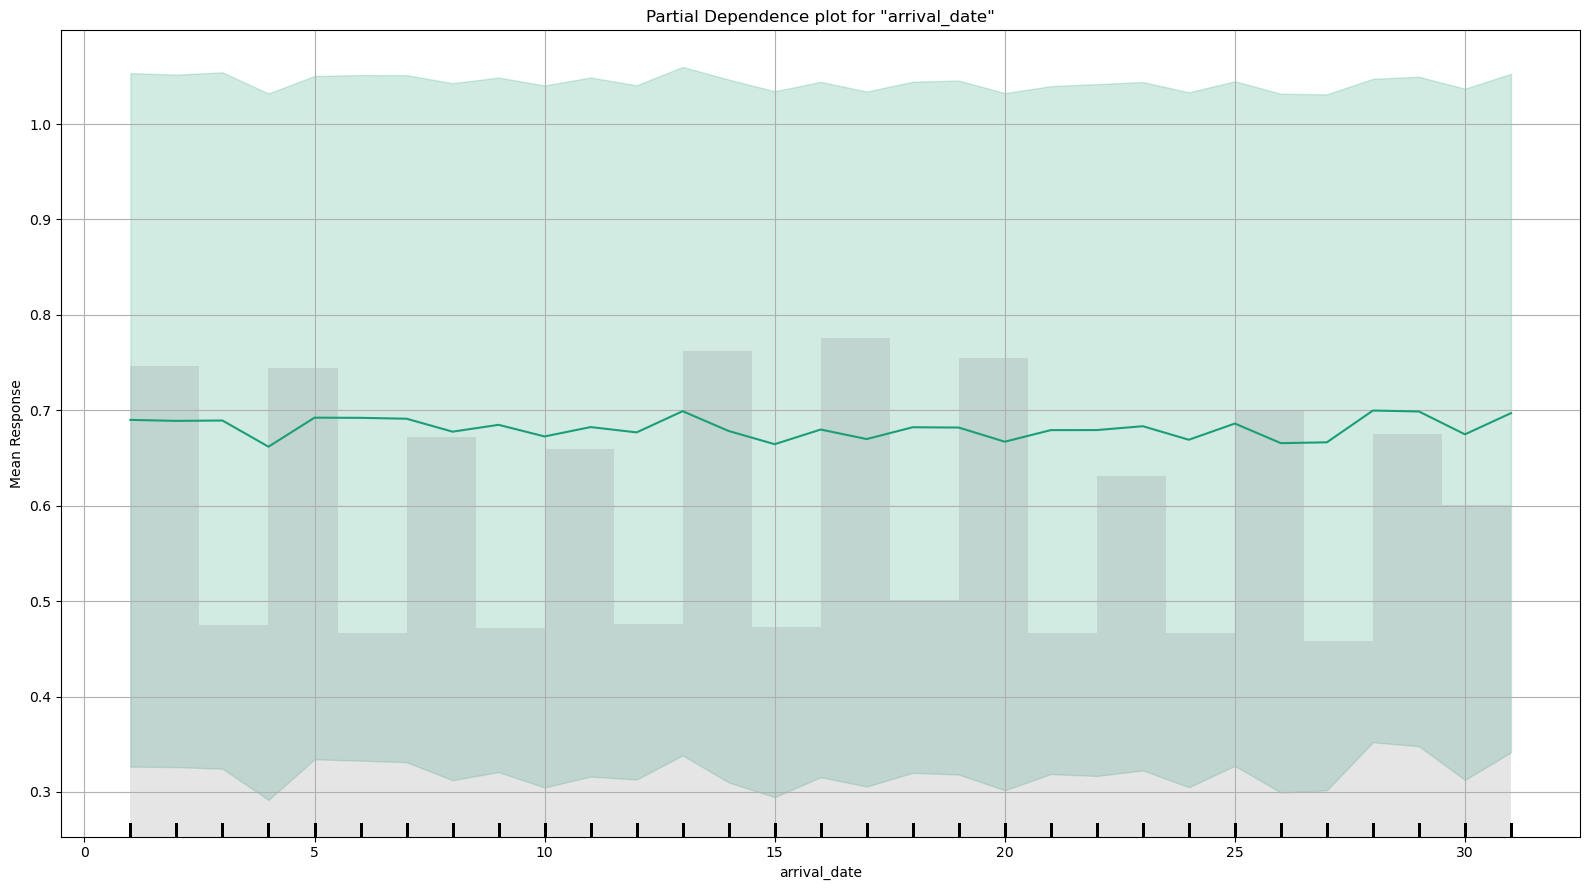

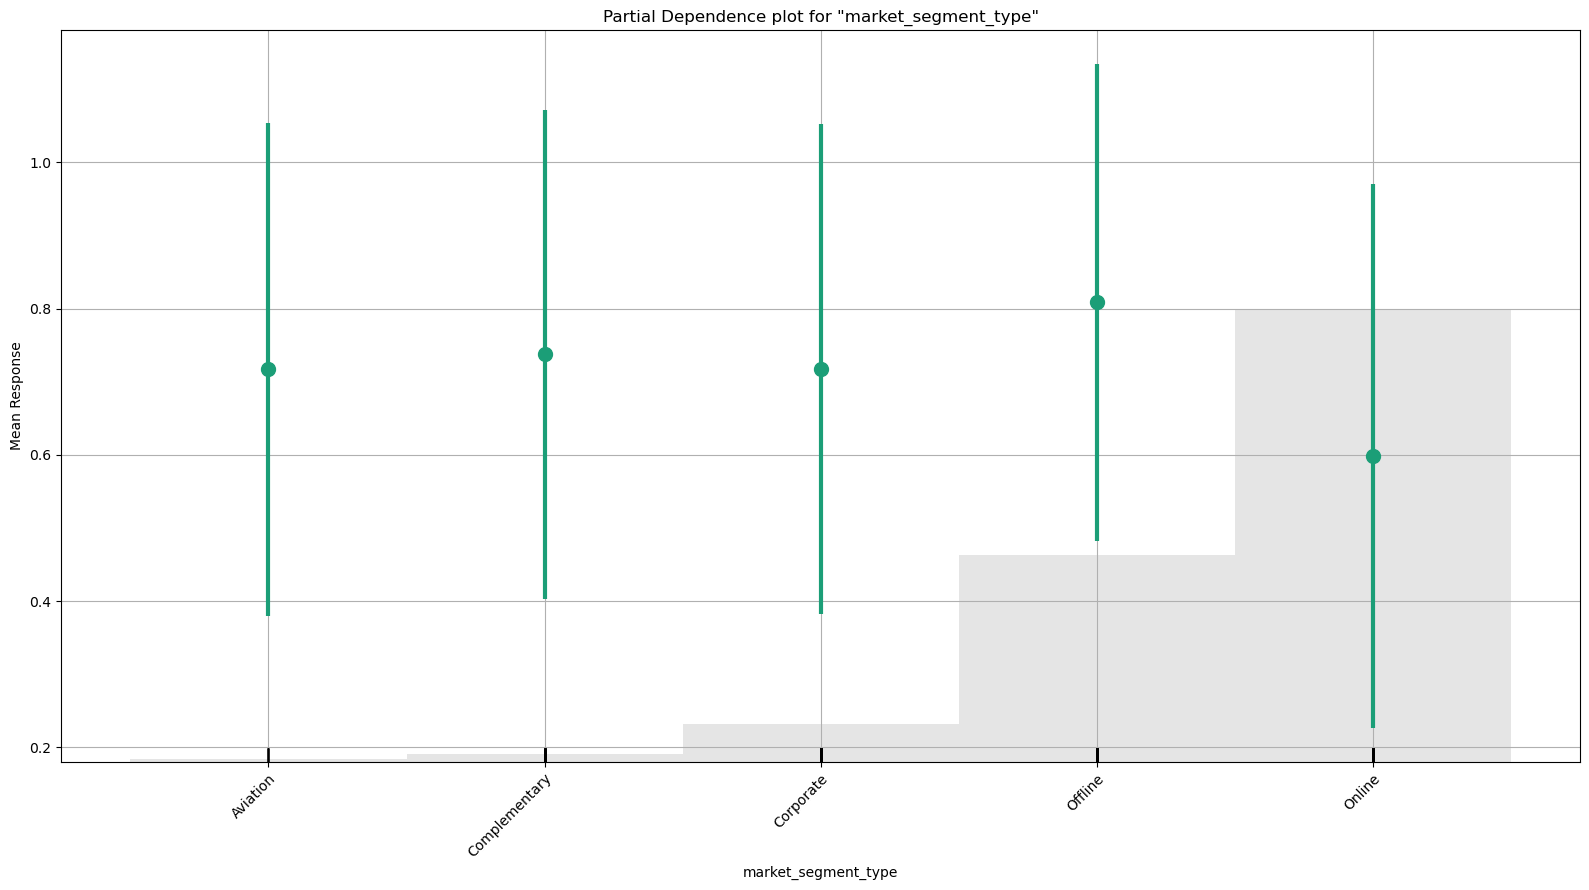

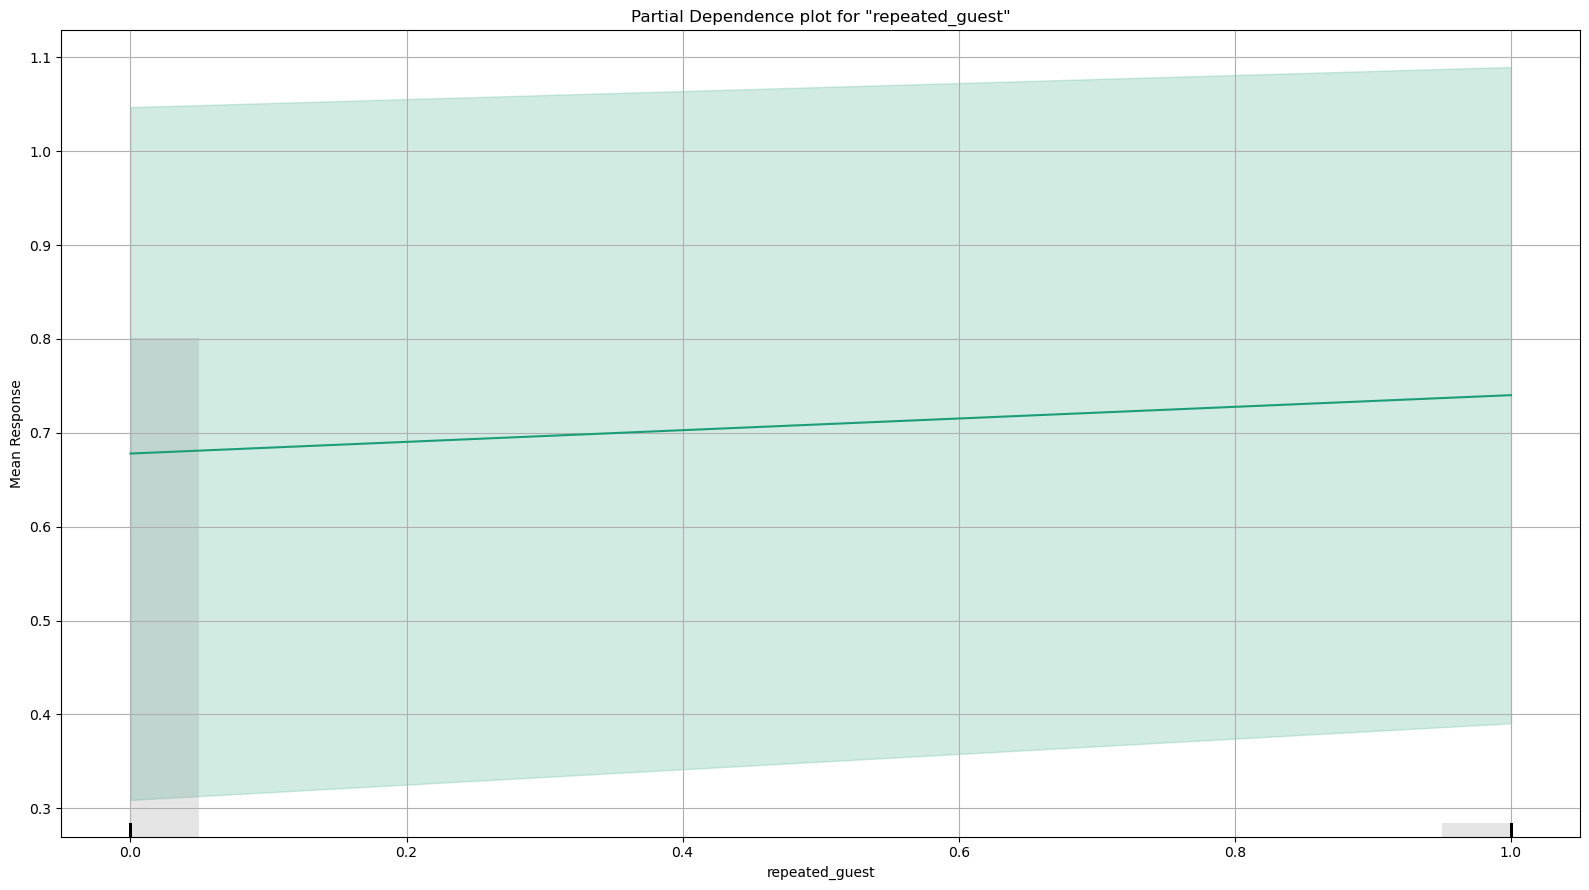

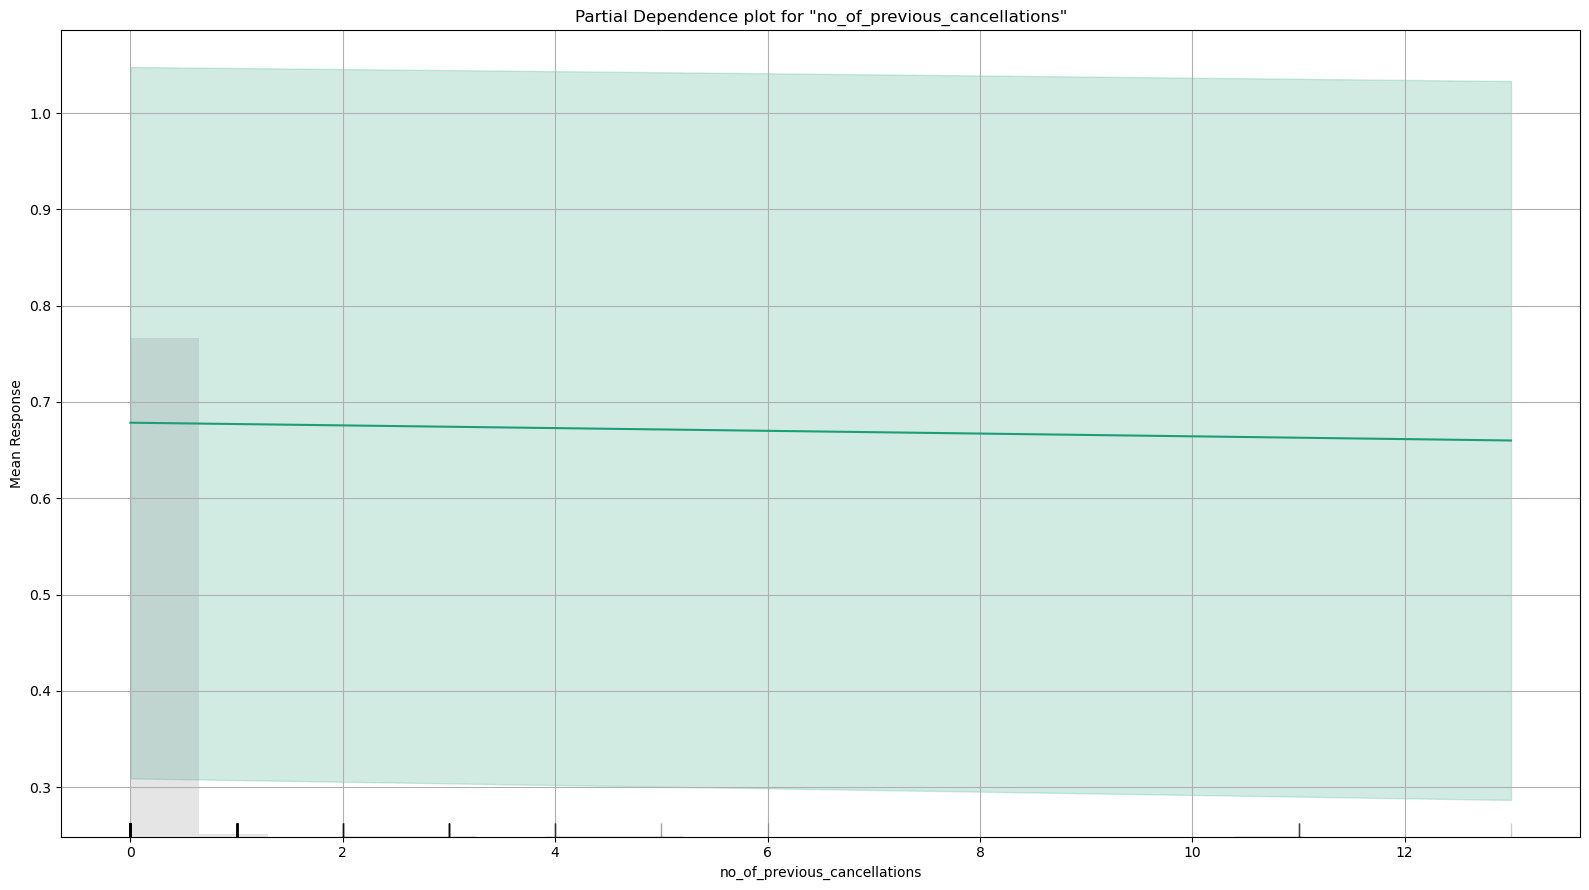

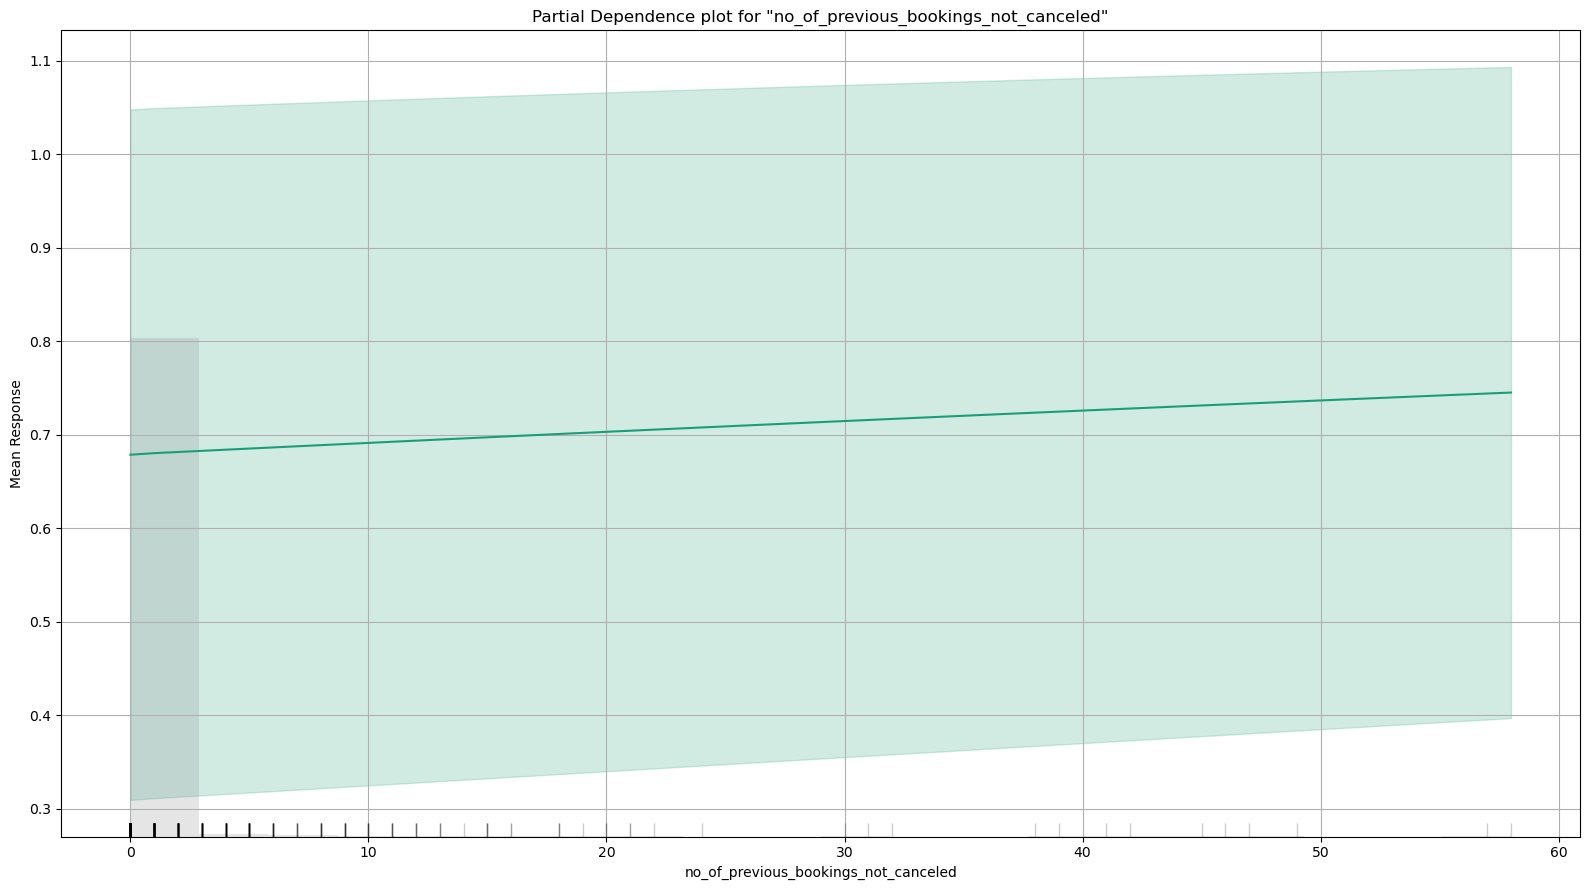

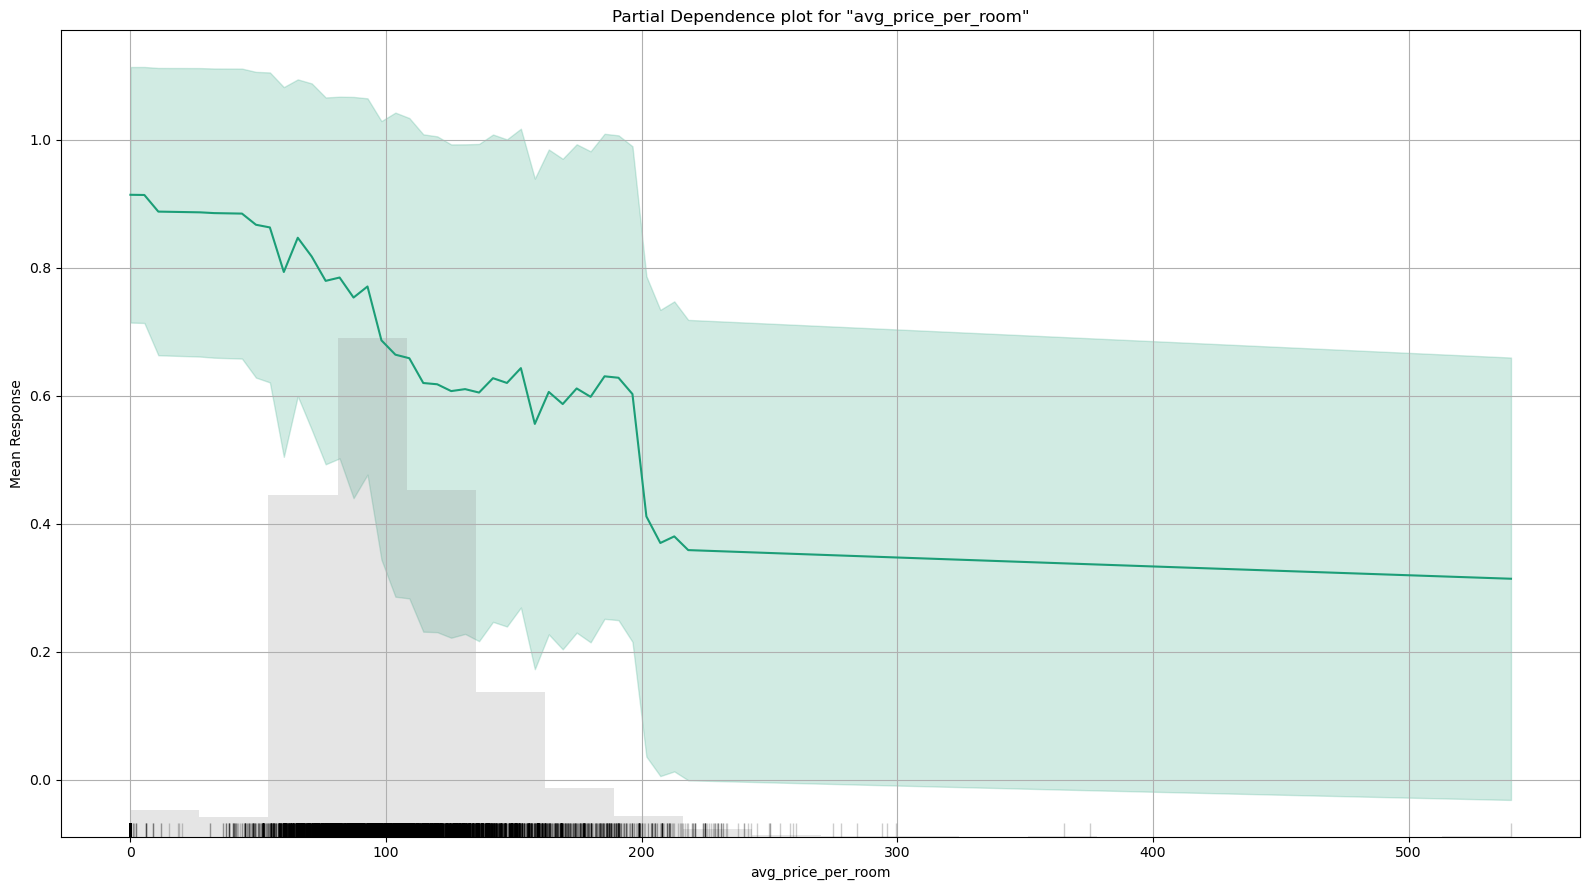

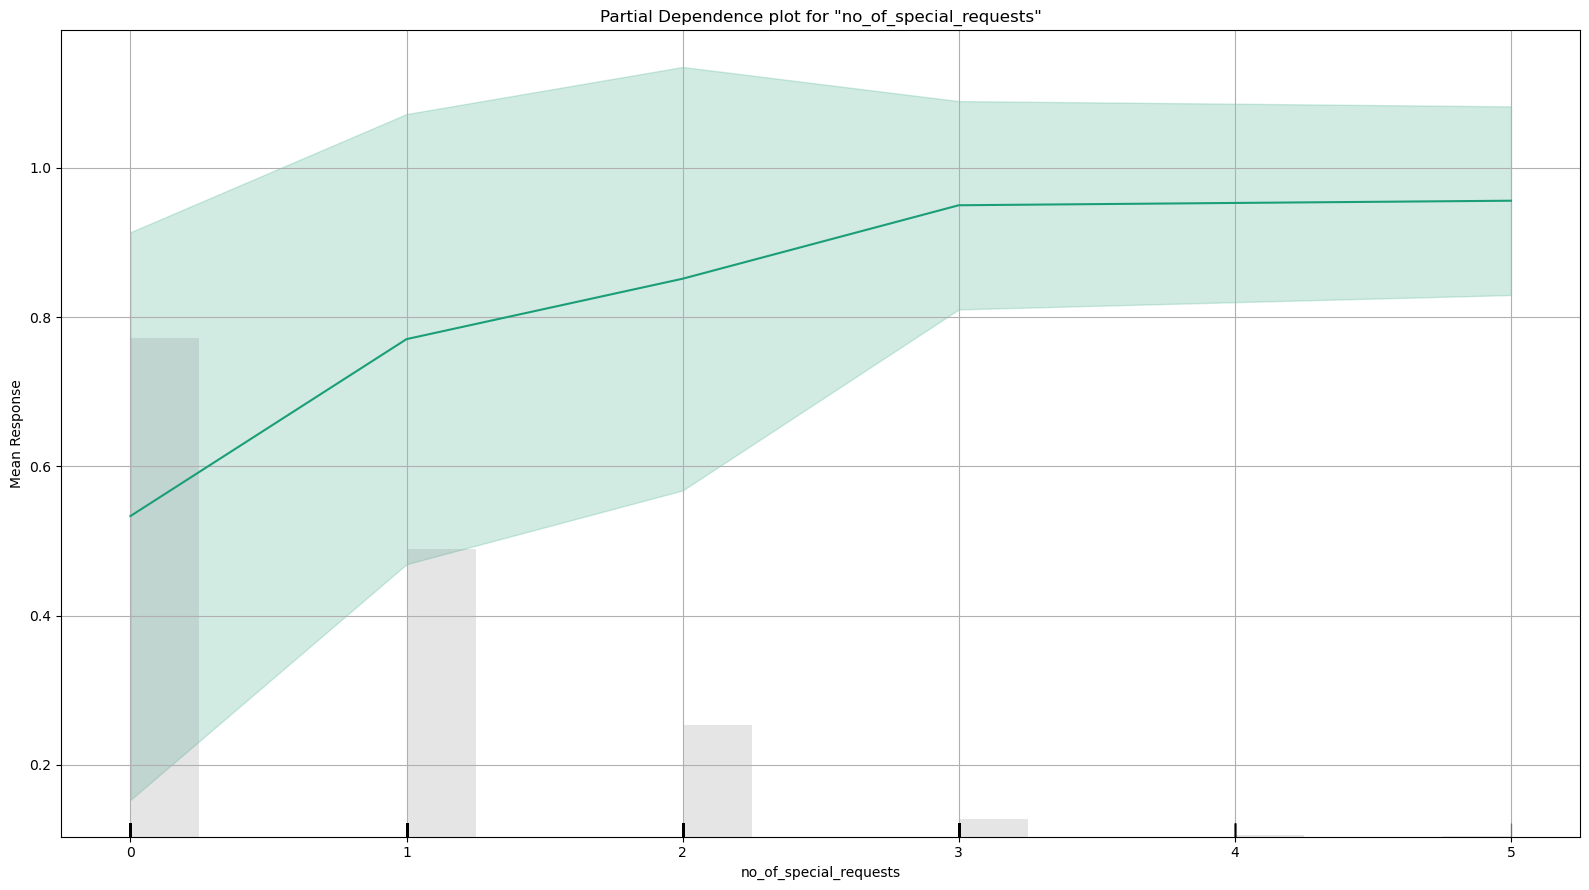

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230309_223147

,Canceled,Not_Canceled,Error,Rate
Canceled,2178.0,712.0,0.2464,(712.0/2890.0)
Not_Canceled,306.0,5831.0,0.0499,(306.0/6137.0)
Total,2484.0,6543.0,0.1128,(1018.0/9027.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [24]:
best_model_with_auc_pr.explain(test)